# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime 
from datetime import date
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
# Start url query
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="


In [7]:
# Set up empty dataframe
cities_df = pd.DataFrame({
    'City': cities,
    'Cloudiness':'',
    'Country':'',
    'Date':'',
    'Humidity':'',
    'Lat':'',
    'Lng':'',
    'Max Temp':'',
    'Wind Speed':''
})

print("Beginning Data Retrieval\n-----------------------------")

counter = 1
page = 1

# Iterate through each city and retrieve data from JSON
for index, row in cities_df.iterrows():
    
    # Find Set #
    if counter == 51: 
        counter = 1
        page += 1
    else:
        pass
    
    try:     
        # Query the API per city
        response = requests.get(query_url + row['City']).json()
        print(f"Processing record {counter} of Set {page} | {row['City']}")

        # If no weather data is found, raise exception
        if response['cod'] == '400':
            raise KeyError
              
        # Otherwise fill dataframe with the JSON data
        else:
            row['Cloudiness'] = response['clouds']['all']
            row['Country'] = response['sys']['country']
            row['Date'] = response['dt']
            row['Humidity'] = response['main']['humidity']
            row['Lat'] = response['coord']['lat']
            row['Lng'] = response['coord']['lon']
            row['Max Temp'] = response['main']['temp_max']
            row['Wind Speed'] = response['wind']['speed']
            
    except (KeyError, IndexError):
        print("City not found. Skipping...")

    counter += 1
              
print("-----------------------------\nData Retrieval Complete\n-----------------------------")        


Beginning Data Retrieval
-----------------------------
Processing record 1 of Set 1 | illela
Processing record 2 of Set 1 | new norfolk
Processing record 3 of Set 1 | samusu
City not found. Skipping...
Processing record 4 of Set 1 | ushuaia
Processing record 5 of Set 1 | mar del plata
Processing record 6 of Set 1 | jardim
Processing record 7 of Set 1 | vaini
Processing record 8 of Set 1 | kungurtug
Processing record 9 of Set 1 | hobart
Processing record 10 of Set 1 | tuktoyaktuk
Processing record 11 of Set 1 | eenhana
Processing record 12 of Set 1 | jamestown
Processing record 13 of Set 1 | rikitea
Processing record 14 of Set 1 | muscat
Processing record 15 of Set 1 | punta arenas
Processing record 16 of Set 1 | port elizabeth
Processing record 17 of Set 1 | arraial do cabo
Processing record 18 of Set 1 | rosetta
Processing record 19 of Set 1 | barentsburg
City not found. Skipping...
Processing record 20 of Set 1 | utiroa
City not found. Skipping...
Processing record 21 of Set 1 | mana

Processing record 31 of Set 4 | bichura
Processing record 32 of Set 4 | mangan
Processing record 33 of Set 4 | tazovskiy
Processing record 34 of Set 4 | nikolskoye
Processing record 35 of Set 4 | tuatapere
Processing record 36 of Set 4 | puerto escondido
Processing record 37 of Set 4 | hamilton
Processing record 38 of Set 4 | kaitangata
Processing record 39 of Set 4 | soyo
Processing record 40 of Set 4 | orlik
Processing record 41 of Set 4 | dingle
Processing record 42 of Set 4 | fortuna
Processing record 43 of Set 4 | narsaq
Processing record 44 of Set 4 | mogadishu
Processing record 45 of Set 4 | tigil
Processing record 46 of Set 4 | makakilo city
Processing record 47 of Set 4 | umzimvubu
City not found. Skipping...
Processing record 48 of Set 4 | bandarbeyla
Processing record 49 of Set 4 | provideniya
Processing record 50 of Set 4 | severo-kurilsk
Processing record 1 of Set 5 | nyrob
Processing record 2 of Set 5 | yenagoa
Processing record 3 of Set 5 | saskylakh
Processing record 4 

Processing record 23 of Set 8 | tipuani
Processing record 24 of Set 8 | tecpan
Processing record 25 of Set 8 | opuwo
Processing record 26 of Set 8 | muros
Processing record 27 of Set 8 | praia da vitoria
Processing record 28 of Set 8 | karaul
City not found. Skipping...
Processing record 29 of Set 8 | caravelas
Processing record 30 of Set 8 | manokwari
Processing record 31 of Set 8 | bandundu
Processing record 32 of Set 8 | carutapera
Processing record 33 of Set 8 | waipawa
Processing record 34 of Set 8 | haljala
Processing record 35 of Set 8 | yar-sale
Processing record 36 of Set 8 | vila
Processing record 37 of Set 8 | kailua
Processing record 38 of Set 8 | camacupa
Processing record 39 of Set 8 | wajima
Processing record 40 of Set 8 | richards bay
Processing record 41 of Set 8 | natitingou
Processing record 42 of Set 8 | fomboni
Processing record 43 of Set 8 | tyrma
Processing record 44 of Set 8 | ziro
Processing record 45 of Set 8 | hornepayne
Processing record 46 of Set 8 | cintal

Processing record 6 of Set 12 | vargashi
Processing record 7 of Set 12 | skibbereen
Processing record 8 of Set 12 | conakry
Processing record 9 of Set 12 | randudongkal
Processing record 10 of Set 12 | boden
Processing record 11 of Set 12 | jiayuguan
Processing record 12 of Set 12 | itaberaba
Processing record 13 of Set 12 | villa carlos paz
Processing record 14 of Set 12 | college
Processing record 15 of Set 12 | oxford
Processing record 16 of Set 12 | cururupu
Processing record 17 of Set 12 | semey
Processing record 18 of Set 12 | sol-iletsk
Processing record 19 of Set 12 | rundu
Processing record 20 of Set 12 | ostrovnoy
Processing record 21 of Set 12 | marabba
Processing record 22 of Set 12 | nan
Processing record 23 of Set 12 | kulachi
Processing record 24 of Set 12 | acapulco
Processing record 25 of Set 12 | vila velha
Processing record 26 of Set 12 | uige
Processing record 27 of Set 12 | lisakovsk
Processing record 28 of Set 12 | caconda
Processing record 29 of Set 12 | solano
P

In [8]:
# Remove rows with no values
cities_df.replace('', np.nan, inplace=True)
cities_df = cities_df.dropna().reset_index(drop=True)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
cities_df.to_csv(output_data_file, index=False, header=True)
cities_df.count()

City          555
Cloudiness    555
Country       555
Date          555
Humidity      555
Lat           555
Lng           555
Max Temp      555
Wind Speed    555
dtype: int64

In [10]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,illela,0.0,NG,1.571070e+09,30.0,12.25,4.30,35.98,2.026
1,new norfolk,4.0,AU,1.571070e+09,87.0,-42.78,147.06,8.89,2.600
2,ushuaia,75.0,AR,1.571070e+09,61.0,-54.81,-68.31,9.00,12.900
3,mar del plata,0.0,AR,1.571070e+09,36.0,-46.43,-67.52,11.08,4.171
4,jardim,0.0,BR,1.571070e+09,25.0,-21.48,-56.15,37.68,3.659


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

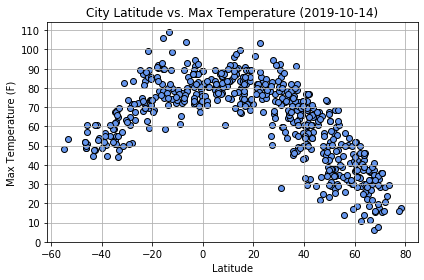

In [12]:
today = date.today()

# Data
latitude = cities_df['Lat']
max_temp_c = cities_df['Max Temp']
max_temp_f = [(temp/0.56 + 32) for temp in max_temp_c]

# Scatter plot
plt.scatter(latitude, max_temp_f, marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.yticks(np.arange(0,max(max_temp_f)+10,10))
plt.grid()

# Labels
plt.title(f'City Latitude vs. Max Temperature ({today})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Save and show graph
plt.tight_layout()
plt.savefig('output_data/lat_v_temp.png')
plt.show()


#### Latitude vs. Humidity Plot

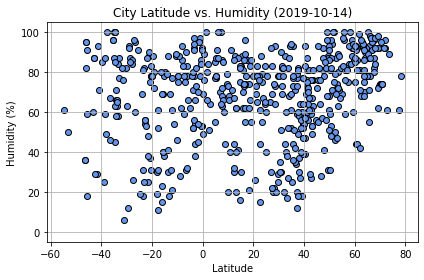

In [13]:
# Data
humidity = cities_df['Humidity']

# Scatter plot
plt.scatter(latitude, humidity, marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.yticks(np.arange(0,120,20))
plt.ylim(-5, 105)
plt.grid()

# Labels
plt.title(f'City Latitude vs. Humidity ({today})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save and show graph
plt.tight_layout()
plt.savefig('output_data/lat_v_humidity.png')
plt.show()


#### Latitude vs. Cloudiness Plot

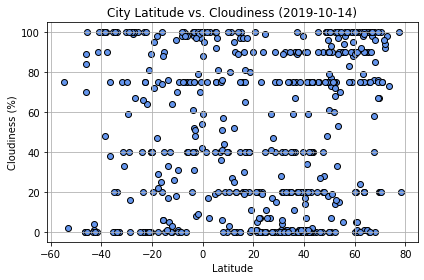

In [14]:
# Data
cloudiness = cities_df['Cloudiness']

# Scatter plot
plt.scatter(latitude, cloudiness, marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.yticks(np.arange(0,120,20))
plt.ylim(-5, 105)
plt.grid()

# Labels
plt.title(f'City Latitude vs. Cloudiness ({today})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save and show graph
plt.tight_layout()
plt.savefig('output_data/lat_v_cloudiness.png')
plt.show()


#### Latitude vs. Wind Speed Plot

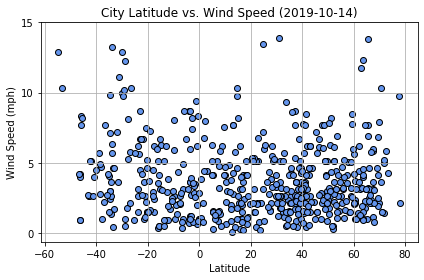

In [15]:
# Data
wind_speed = cities_df['Wind Speed']

# Scatter plot
plt.scatter(latitude, wind_speed, marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.yticks(np.arange(0,max(wind_speed)+5,5))
plt.grid()

# Labels
plt.title(f'City Latitude vs. Wind Speed ({today})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Save and show graph
plt.tight_layout()
plt.savefig('output_data/lat_v_windspeed.png')
plt.show()


# Summary
1. There is a visible bell curve in the relationship between latitude and max temperature. Max temperature increases from -60 degrees to 0 degrees. Max temp peaks somewhere between 0 degrees and 20 degrees latitude, then decreases as latitude gets further north from 0 degrees to 80 degrees. The curve may have continued below -60 degrees latitude, but there was not enough data to be plotted.
2. There doesn't seem to be a relationship between latitude and humidity although there is some clustering around -20 degrees and about 40 degrees latitude. This could be affected by the proximity of land and water more so than latitude. It would be interesting to graph humidity on a world map to view the relationship between humidity and land regions/water rather than just latitude.
3. The relationship between latitude and cloudiness doesn't seem apparent but there is some clustering around 0%, 20%, 40%, 75% and 100% cloudiness. The cause of this affect is unclear. Another weather measure we could include in this data set is atmospheric pressure which is also collected by the OpenWeather Map API as 'pressure' (under the key 'main'). Then we could compare pressure to cloudiness, along with wind speed, etc.